# Pair Programming Preprocesado

In [ ]:
pip install imblearn

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd


# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


# Estandarización variables numéricas y Codificación variables categóricas
# ------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler

# Gestión datos desbalanceados
# ------------------------------------------------------------------------------
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

# Para separar los datos en train y test
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split

#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


Usando el mismo dataset que usatéis ayer:

In [2]:
df_diabetes = pd.read_csv("datos/diabetes_limpio.csv", index_col=0)
df_diabetes.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72,35,0.0,33.6,50,1
1,1,85,66,29,0.0,26.6,31,0


In [3]:
# Hacemos una copia del dataset que hemos cargado:
df = df_diabetes.copy()

Los objetivos de los ejercicios de hoy son:

#### 1. Estandarizar las variables numéricas de vuestro set de datos:

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Age', 'Outcome'],
      dtype='object')

Para estandarizar, utilizaremos el Standard Scaler por ser el más mapliamente utilizado:

In [5]:
# Iniciamos entonces el método para escalar:
scaler = StandardScaler()

Como la estandarización sólo se realiza en las variables predictoras numéricas, no tendremos en cuenta las demás: 

In [6]:
numericas = df.select_dtypes(include = np.number)
numericas.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72,35,0.0,33.6,50,1
1,1,85,66,29,0.0,26.6,31,0


In [7]:
#quitamos la variable respuesta:
numericas.drop(["Outcome"], axis = 1, inplace = True)

In [8]:
# Ajustamos nuestros datos:  

scaler.fit(numericas)

# los transformamos:

X_escaladas = scaler.transform(numericas)

# y convertiremos el array que nos devuelve en un dataframe:

numericas_estandar = pd.DataFrame(X_escaladas, columns = numericas.columns)
numericas_estandar.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,0.678427,0.866045,-0.017650,0.928238,-0.784632,0.218695,1.56040
1,-0.851320,-1.205066,-0.556276,0.545788,-0.784632,-0.873966,-0.15934


In [9]:
numericas_estandar.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Age'],
      dtype='object')

In [10]:
# Quitamos las columnas que no están estandarizadas:

df.drop(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age'], axis = 1, inplace=True)
df.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [11]:
# Unimos las ya estandarizadas, al df original:

df_estand = pd.concat([df, numericas_estandar], axis = 1)

df_estand.head()

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,1,0.678427,0.866045,-0.017650,0.928238,-0.784632,0.218695,1.560400
1,0,-0.851320,-1.205066,-0.556276,0.545788,-0.784632,-0.873966,-0.159340
2,1,1.290326,2.016662,-0.735818,-1.302720,-0.784632,-1.389077,-0.068827
3,0,-0.851320,-1.073567,-0.556276,0.163338,0.426735,-0.639824,-1.064466
4,1,-1.157270,0.504422,-2.890320,0.928238,1.380365,1.701591,0.021685


#### 2.Codificad las variables categóricas. (Recordad que tendréis que tener en cuenta si vuestras variables tienen orden o no).

En nuestro caso no contamos con variables categóricas, por lo que no podemos hacer el proceso de codificación.

In [12]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    float64
 5   BMI            768 non-null    float64
 6   Age            768 non-null    int64  
 7   Outcome        768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 54.0 KB


#### 3. Chequead si vuestros datos están balanceados. 

En caso de que no lo estén utilizad algunas de las herramientas aprendidas en la lección para balancearlos.

In [13]:
df_estand_balanc = df_estand.copy()

In [15]:
df_estand_balanc.head()

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,1,0.678427,0.866045,-0.017650,0.928238,-0.784632,0.218695,1.560400
1,0,-0.851320,-1.205066,-0.556276,0.545788,-0.784632,-0.873966,-0.159340
2,1,1.290326,2.016662,-0.735818,-1.302720,-0.784632,-1.389077,-0.068827
3,0,-0.851320,-1.073567,-0.556276,0.163338,0.426735,-0.639824,-1.064466
4,1,-1.157270,0.504422,-2.890320,0.928238,1.380365,1.701591,0.021685


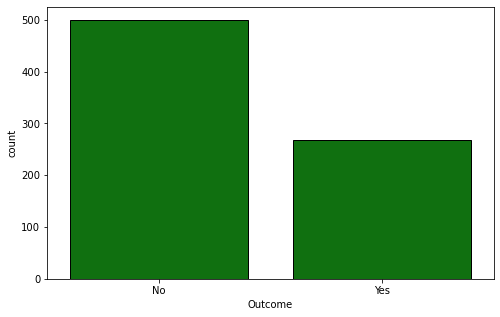

In [16]:
# Volvemos a ver cómo es la distribución de nuestro datos:

plt.figure(figsize=(8,5)) 

fig1 = sns.countplot(data = df_estand_balanc, x = "Outcome",  color = "green",  edgecolor='black')
fig1.set(xticklabels=["No", "Yes"]) 
plt.show()

In [17]:
df_estand_balanc["Outcome"].value_counts() / df_estand_balanc.shape[0]

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

La proporción en nuestra variable respuesta es de 65/35.

Para evitar los inconvenientes del desbalanceo usando Pandas, vamos a utilizaar el método SMOTE Tomek:

In [18]:
df_estand_balanc.head(2)

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,1,0.678427,0.866045,-0.017650,0.928238,-0.784632,0.218695,1.56040
1,0,-0.851320,-1.205066,-0.556276,0.545788,-0.784632,-0.873966,-0.15934


In [19]:
# para aplicar este método lo primero que tenemos que hacer es separar en X e y y en 
 #train y test como aprendimos en la lecciones de regresion lineal

y = df_estand_balanc['Outcome']
X = df_estand_balanc.drop('Outcome', axis=1)


#dividimos en sets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [20]:
# iniciamos el método
os_us = SMOTETomek()

# ajustamos el modelo
X_train_res, y_train_res = os_us.fit_resample(X_train, y_train)

In [21]:
#el número de datos que tenemos previamente:
y_train.value_counts()

0    351
1    186
Name: Outcome, dtype: int64

In [22]:
#el número de datos que tenemos después:
y_train_res.value_counts()

1    335
0    335
Name: Outcome, dtype: int64

#### 4.Guardad el dataframe con los cambios que habéis aplicado para utilizarlo en la siguiente lección.

In [23]:
df_est_y_bal = pd.concat([X_train_res, y_train_res], axis=1)
df_est_y_bal.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,-0.851320,1.950912,-0.735818,0.609530,1.535007,0.296742,0.474248,1
1,-0.239421,0.241424,1.777768,1.820621,1.212835,0.655759,-0.068827,1


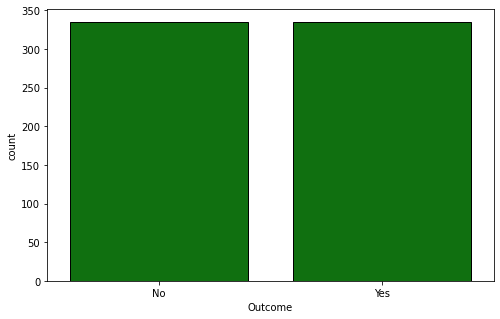

In [24]:
plt.figure(figsize=(8,5)) 

fig1 = sns.countplot(data = df_est_y_bal, x = "Outcome",  color = "green",  edgecolor='black')
fig1.set(xticklabels=["No", "Yes"]) 
plt.show()

In [25]:
#guardamos el archivo con los datos estandarizados:
df_estand.to_csv("datos/diabetes_estand.csv")
# y con los datos estandarizados y balanceados:
df_est_y_bal.to_csv("datos/diabetes_est_balanc.csv")
